<a href="https://colab.research.google.com/github/analyst-rhie/Dacon/blob/main/%EB%86%8D%EC%B6%95%EC%82%B0%EB%AC%BC%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### train_AT_TSALET_ALL : 학습용 전국 도매시장 거래정보 데이터
 * SALEDATE: 경락 일자
   * 그날 형성된 경락값은 곧 농산물의 기준가격을 뜻한다. 농가가 대형 유통업체와 직거래할 때도 경락값은 가격교섭의 가장 중요한 근거가 된다.　
 * WHSAL_NM: 도매시장
 * CMP_NM: 법인
 * PUM_NM: 품목
 * KIND_NM: 품종
 * DAN_NM: 단위
 * POJ_NM: 포장
 * SIZE_NM: 크기
 * LV_NM: 등급
 * SAN_NM: 산지
 * DANQ: 단위중량
 * QTY: 물량
 * COST: 단가
 * TOT_QTY: 총물량 (음수로 집계된 값은 거래 취소 내역)
 * TOT_AMT: 총금액


 * 주요 참고사항
   * 공휴일이나 일요일같은 경우 도매시장이 열지 않기도 합니다.
     * 0으로 표시된 데이터는 해당 일자에 거래가 없었다고 생각해주시면 됩니다.
     * Score 채점시 정답 가격이 0인 데이터는 제외하고 채점됩니다.
(대회안내 - 규칙 - 평가 - 1차 평가 - 평가산식 코드 참고)
target_idx = np.where(answer!=0)
  * Public 데이터는 Public Score 평가에 사용되는 데이터입니다.
    * Public Score는 Private Score 평가 이전에 본인의 모델 성능을 가늠할 수 있는 점수로, 최종 스코어에는 반영되지 않습니다.
    * Private Score는 최종 스코어에 반영되는 점수이고, 여기에 사용되는 데이터가 Private 데이터입니다.
실제 제출 기간(2021년 9월 28일 ~ 2021년 11월 4일)에 평가되는 것은 Private Score이며,
따라서 실제 제출 기간에 사용하는 데이터는 Private 데이터입니다.
    * Private 데이터는 제출 기간에 농넷 API를 활용해서 얻으실 수 있습니다. (제출 일자 하루 전까지의 최신 정보)
해당 API는 Private 기간 시작 전에 제공 예정입니다.
    * 제출 기간 시작일 이전의 데이터 (2021.08.24 ~ 2021.09.27)는 추후 제공될 API를 활용해서 얻으시면 되고,
이를 Private 데이터로 합쳐서 활용하실 수 있습니다. 다시 말하면, Public 데이터도 모두 활용하여 (2016.01.01~2021.09.27) 기간 내 데이터를 활용하실 수 있으며,
예측일 시점에 얻을 수 있는 모든 데이터는 학습에 활용 가능합니다. (ex 2021년 9월 30일 →  학습셋에 9월 28, 29일 데이터 추가 가능)
    * 가격산출시 거래취소내역(음수로 집계)은 반영하지 않고있습니다.
('코드 공유' -  'AT_TSALET_ALL 파일 전처리 코드' 참고)
(# 날짜별, 품목별, 거래량이 0 이상인 행만 선택)
            c = tsalet_sample[(tsalet_sample['SALEDATE']==day) & (tsalet_sample['PUM_NM']==sub) & (tsalet_sample['TOT_QTY']>0)]

    * 때문에 train set 생성시 음수인 데이터는 포함이 되지 않고, 이를 학습한 모델 역시 음수값을 예측값으로 내놓지 않을 것입니다.
만약 이와 다르게 전처리를 하셔서 train set에 음수가 포함되어있다면, 추가적으로 음수 데이터 제거 작업을 해주시는 게 좋을 것 같습니다.

    * 참고로 Score 채점시 정답 가격이 0인 데이터는 제외하고 채점됩니다.
(대회안내 - 규칙 - 평가 - 1차 평가 - 평가산식 코드 참고)
target_idx = np.where(answer!=0)
즉, 실제 시장 거래가 없는 일요일, 공휴일 등의 경우는 자동으로 Score 산정 과정에서 제외됩니다.
따라서 제출하실 정답지에 의도적으로 0을 채워넣을 필요는 없습니다.
    * train.csv에서 건고추가 10만원 이상에 거래되는 일자는 2016년 12월 31일, 2020년3월17일 두 개로 파악됩니다. 해당 거래내역에 대해 주최측을 통해 도매시장에 확인해본 결과, 실제로 해당 가격에 거래된 내역이 맞습니다.
하지만 매우 특이한 경우라고 설명해주셨습니다. 따라서 정확한 가격값은 맞으나, 이상치에 해당한다고 생각해주시면 될 것 같습니다. 해당 이상치에 대해서는 적절한 전처리를 해주시면 됩니다.


In [18]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [9]:
years = {'202011','202012','202101','202102','202103','202104','202105','202106','202107','202108'}
for i in years :
    globals()['df_{}'.format(i)]=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/농산물/private_data/AT_TSALET_ALL/AT_TSALET_ALL_{i}.csv')


In [22]:
# 데이터 살펴보기
df_202011.head()
# 쓸모 있는 변수는
# SALEDATE(판매일), SAN_NM(산지)

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,2020-11-06,인천구월도매,인천농산물,고구마,호박고구마,kg,상자,.,상,충청남도 당진군,10.0,1,14000.0,10.0,14000
1,2020-11-06,인천삼산도매,부평농산,양상추,양상추(일반),kg,상자,.,특,전남 광양시,8.0,5,13000.0,40.0,65000
2,2020-11-06,인천삼산도매,부평농산,양상추,양상추(일반),kg,상자,.,특,전남 광양시,8.0,5,13000.0,40.0,65000
3,2020-11-06,인천삼산도매,부평농산,양상추,양상추(일반),kg,상자,.,특,전남 광양시,8.0,5,13000.0,40.0,65000
4,2020-11-06,인천삼산도매,부평농산,양상추,양상추(일반),kg,상자,.,특,전남 광양시,8.0,5,13000.0,40.0,65000


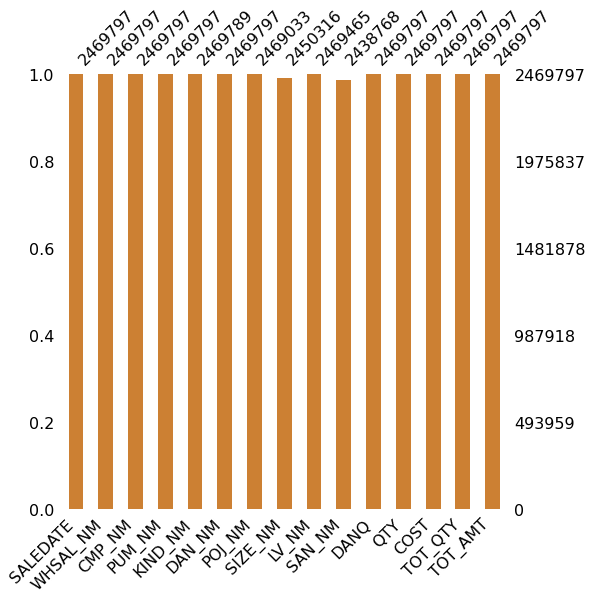

In [19]:
# 결측값 확인
msno.bar(df=df_202011.iloc[:,:], figsize=(8,8), color = (0.8,0.5, 0.2))
